In [12]:
import math
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [13]:
m = 4
n = 6

tri = nx.triangular_lattice_graph(m, n, periodic=True, with_positions=True, create_using=None)
print(tri.nodes(data=True))

# Print the number of nodes
print(f"Number of nodes in the graph: {tri.number_of_nodes()}")

[((0, 0), {'contraction': {(0, 4): {}, (3, 0): {'contraction': {(3, 4): {}}}}, 'pos': (0.0, 0.0)}), ((1, 0), {'contraction': {(1, 4): {}}, 'pos': (1.0, 0.01)}), ((2, 0), {'contraction': {(2, 4): {}}, 'pos': (2.0, 0.04)}), ((0, 1), {'contraction': {(3, 1): {}}, 'pos': (0.5, 0.8660254037844386)}), ((1, 1), {'pos': (1.5, 0.8760254037844386)}), ((2, 1), {'pos': (2.5, 0.9060254037844386)}), ((0, 2), {'contraction': {(3, 2): {}}, 'pos': (0.0, 1.7320508075688772)}), ((1, 2), {'pos': (1.0, 1.7420508075688772)}), ((2, 2), {'pos': (2.0, 1.7720508075688772)}), ((0, 3), {'contraction': {(3, 3): {}}, 'pos': (0.5, 2.598076211353316)}), ((1, 3), {'pos': (1.5, 2.608076211353316)}), ((2, 3), {'pos': (2.5, 2.638076211353316)})]
Number of nodes in the graph: 12


In [14]:
# Print nodes with their indices based on their position in the nodes list
print("Nodes with their indices:")
for index, node in enumerate(tri.nodes()):
    print(f"Index: {index}, Node: {node}")

Nodes with their indices:
Index: 0, Node: (0, 0)
Index: 1, Node: (1, 0)
Index: 2, Node: (2, 0)
Index: 3, Node: (0, 1)
Index: 4, Node: (1, 1)
Index: 5, Node: (2, 1)
Index: 6, Node: (0, 2)
Index: 7, Node: (1, 2)
Index: 8, Node: (2, 2)
Index: 9, Node: (0, 3)
Index: 10, Node: (1, 3)
Index: 11, Node: (2, 3)


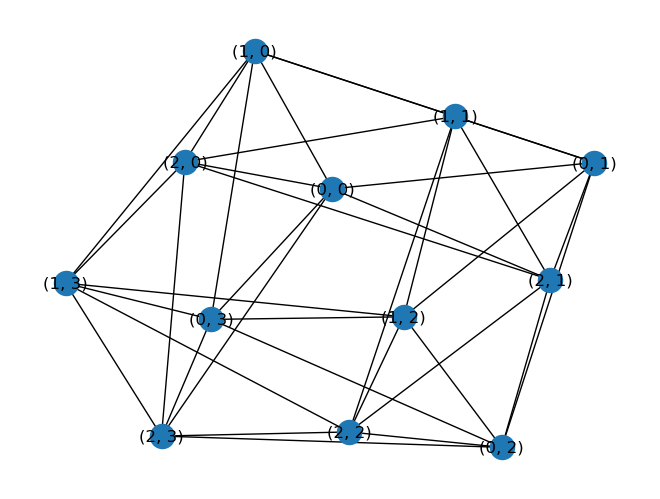

In [15]:
nx.draw(tri, with_labels=True)

In [16]:
# List all bonds (edges) in the graph
print("Bonds (edges) in the graph:")
print(list(tri.edges(data=False)))

Bonds (edges) in the graph:
[((0, 0), (1, 0)), ((0, 0), (0, 1)), ((0, 0), (0, 3)), ((0, 0), (2, 0)), ((0, 0), (2, 1)), ((0, 0), (2, 3)), ((1, 0), (2, 0)), ((1, 0), (1, 1)), ((1, 0), (0, 1)), ((1, 0), (0, 3)), ((1, 0), (1, 3)), ((2, 0), (2, 1)), ((2, 0), (1, 1)), ((2, 0), (1, 3)), ((2, 0), (2, 3)), ((0, 1), (1, 1)), ((0, 1), (0, 2)), ((0, 1), (1, 2)), ((0, 1), (2, 1)), ((1, 1), (2, 1)), ((1, 1), (1, 2)), ((1, 1), (2, 2)), ((2, 1), (2, 2)), ((2, 1), (0, 2)), ((0, 2), (1, 2)), ((0, 2), (0, 3)), ((0, 2), (2, 2)), ((0, 2), (2, 3)), ((1, 2), (2, 2)), ((1, 2), (1, 3)), ((1, 2), (0, 3)), ((2, 2), (2, 3)), ((2, 2), (1, 3)), ((0, 3), (1, 3)), ((0, 3), (2, 3)), ((1, 3), (2, 3))]


In [17]:
# Assign indices to nodes
node_indices = {node: index for index, node in enumerate(tri.nodes())}

# Print nodes with their indices
print("Nodes with their indices:")
for node, index in node_indices.items():
    print(f"Node: {node}, Index: {index}")

# Print edges using indices
print("Edges with indices:")
edges_with_indices = [(node_indices[edge[0]], node_indices[edge[1]]) for edge in tri.edges()]
print(edges_with_indices)

Nodes with their indices:
Node: (0, 0), Index: 0
Node: (1, 0), Index: 1
Node: (2, 0), Index: 2
Node: (0, 1), Index: 3
Node: (1, 1), Index: 4
Node: (2, 1), Index: 5
Node: (0, 2), Index: 6
Node: (1, 2), Index: 7
Node: (2, 2), Index: 8
Node: (0, 3), Index: 9
Node: (1, 3), Index: 10
Node: (2, 3), Index: 11
Edges with indices:
[(0, 1), (0, 3), (0, 9), (0, 2), (0, 5), (0, 11), (1, 2), (1, 4), (1, 3), (1, 9), (1, 10), (2, 5), (2, 4), (2, 10), (2, 11), (3, 4), (3, 6), (3, 7), (3, 5), (4, 5), (4, 7), (4, 8), (5, 8), (5, 6), (6, 7), (6, 9), (6, 8), (6, 11), (7, 8), (7, 10), (7, 9), (8, 11), (8, 10), (9, 10), (9, 11), (10, 11)]


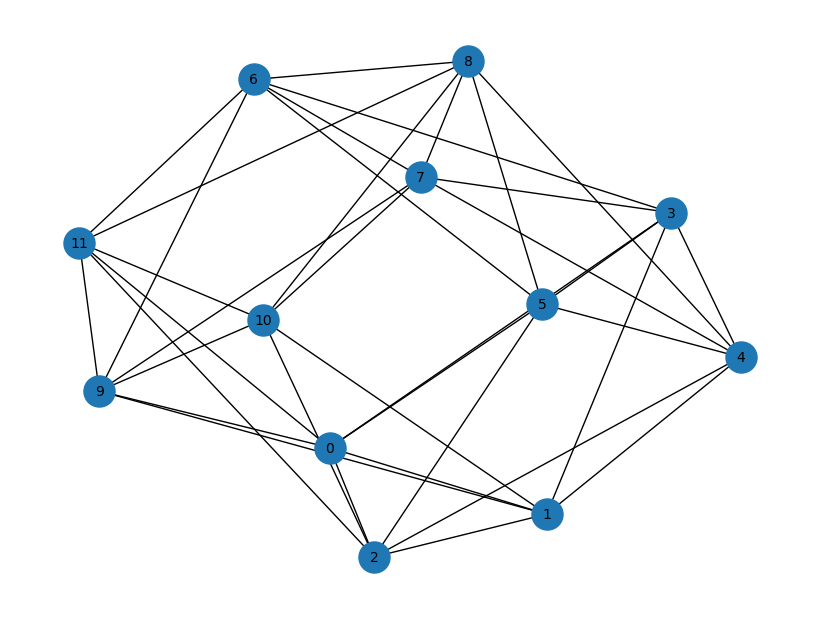

In [19]:
# Relabel nodes in the graph using their indices
tri_relabelled = nx.relabel_nodes(tri, node_indices)

# Draw the graph with indices as labels
plt.figure(figsize=(8, 6))
nx.draw(tri_relabelled, with_labels=True, node_size=500, font_size=10)
plt.show()

Number of nodes in the Kagome lattice: 12
Number of edges in the Kagome lattice: 23


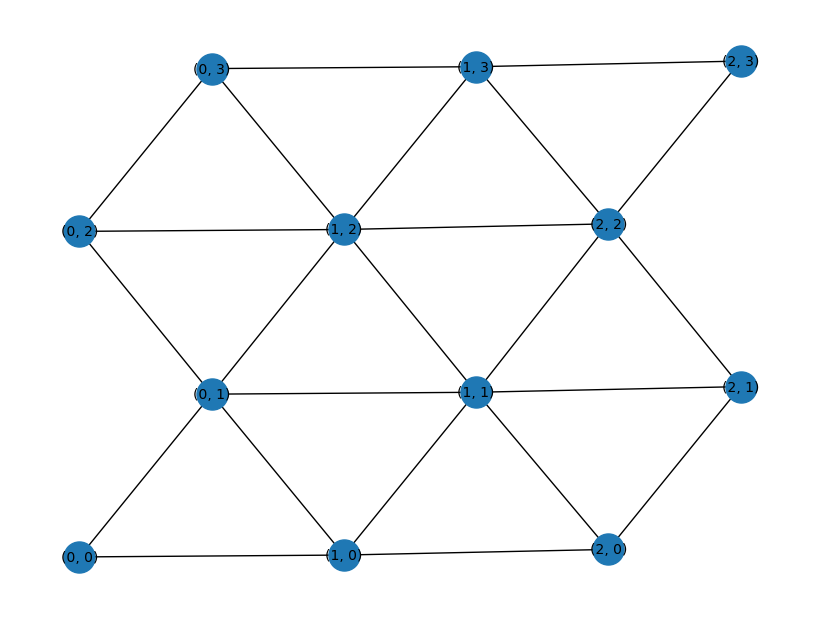

In [23]:
# kagome lattice - attempt

tri = nx.triangular_lattice_graph(m, n, periodic=True, with_positions=True, create_using=None)

# Convert the triangular lattice to a Kagome lattice by removing certain edges
kagome = nx.Graph()
positions = nx.get_node_attributes(tri, 'pos')  # Get node positions
kagome.add_nodes_from(tri.nodes(data=True))  # Add all nodes with positions

# Add edges selectively to form the Kagome lattice
for edge in tri.edges():
    x1, y1 = positions[edge[0]]
    x2, y2 = positions[edge[1]]
    if abs(x1 - x2) + abs(y1 - y2) < 1.5:  # Keep only shorter edges
        kagome.add_edge(*edge)

# Print the number of nodes and edges in the Kagome lattice
print(f"Number of nodes in the Kagome lattice: {kagome.number_of_nodes()}")
print(f"Number of edges in the Kagome lattice: {kagome.number_of_edges()}")

# Draw the Kagome lattice
plt.figure(figsize=(8, 6))
nx.draw(kagome, pos=positions, with_labels=True, node_size=500, font_size=10)
plt.show()

Number of nodes in the graph: 12
Number of edges in the graph: 36


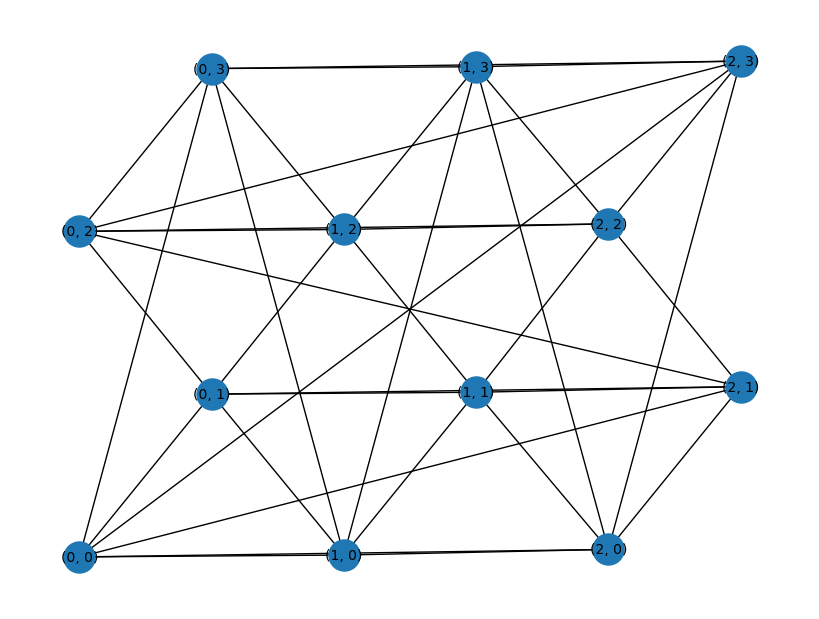

In [21]:
# triangular lattice with pbc along y-direction - attempt

# Get node positions
positions = nx.get_node_attributes(tri, 'pos')

# Enforce periodicity in the y-direction
for node1, pos1 in positions.items():
    for node2, pos2 in positions.items():
        # Check if nodes are on opposite edges in the y-direction
        if abs(pos1[1] - pos2[1]) == (n - 1) and pos1[0] == pos2[0]:
            tri.add_edge(node1, node2)

# Print the number of nodes and edges
print(f"Number of nodes in the graph: {tri.number_of_nodes()}")
print(f"Number of edges in the graph: {tri.number_of_edges()}")

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(tri, pos=positions, with_labels=True, node_size=500, font_size=10)
plt.show()